In [107]:
import pandas as pd
import os
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (15, 6)

## Carregar dados

In [257]:
proc_path = os.path.expanduser("~/dados-ic/output/")

In [311]:
myd_path = os.path.join(proc_path, "modis_aqua.csv")
tsi_path = os.path.join(proc_path, "tsi-centered-myd.csv")

In [312]:
data1 = pd.read_csv(myd_path, na_values=["--"])
data1.Time = pd.to_datetime(data1.Time)

data2 = pd.read_csv(tsi_path, na_values=["--"])
data2.Time = pd.to_datetime(data2.Time)

## Filtrar dados

In [313]:
# Coloque aqui colunas para serem comparadas
col1 = "Cloud_Fraction"
col2 = "TSI_CloudFraction"
delta_col = "Delta"
filter_col = "Timedelta"

# Filtrar NaNs
data3 = pd.merge(data1, data2, on="Time", how="outer")
y1 = data3[col1]
y2 = data3[col2]
inds = np.isfinite(y1)
inds &= np.isfinite(y2)
data3 = data3[inds]

In [314]:
timedeltas = sorted(np.unique(data3["Timedelta"]))
deltas = sorted(np.unique(data3["Delta"]))

qtd_deltas = len(deltas)
qtd_timedeltas = len(timedeltas)

mtr = np.zeros((qtd_timedeltas, qtd_deltas))

In [315]:
i = 0
j = 0

for timedelta in timedeltas:
    for delta in deltas:
        output["delta"].append(delta)

        data4 = data3[data3["Delta"] == delta]
        data4 = data4[data4["Timedelta"] == timedelta]
        y1 = data4[col1]
        y2 = data4[col2]

        inds = np.isfinite(y2)
        inds &= np.isfinite(y1)
        #inds &= y1 < 0.99
        #inds &= y2 < 0.99

        y1 = y1[inds]
        y2 = y2[inds]
        mtr[i, j] = np.corrcoef(y1, y2)[1, 0]
        j += 1
    j = 0
    i += 1

#plt.plot(output["delta"], output["r"], '--o')
#plt.title("Correlação entre %s e %s, fixado em %s=%s" % (col1, col2, filter_col, data3[filter_col].iloc[0]))
#plt.xlabel(delta_col)
#plt.ylabel("r²")
#plt.show()

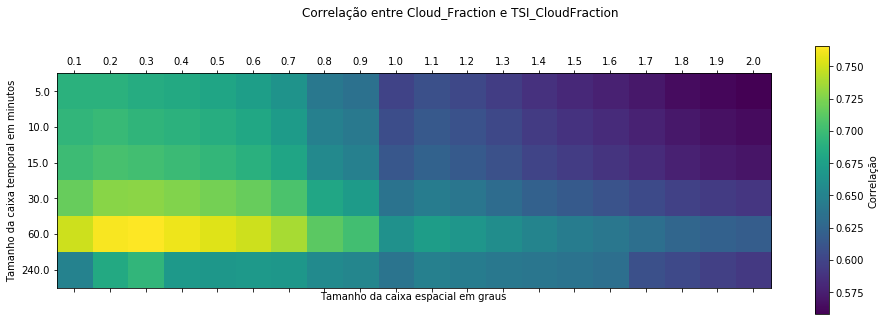

In [316]:
plt.matshow(mtr)
plt.xticks(np.arange(len(deltas)), deltas)
plt.yticks(np.arange(len(timedeltas)), np.array(timedeltas) / 60)
plt.xlabel("Tamanho da caixa espacial em graus")
plt.ylabel("Tamanho da caixa temporal em minutos")
plt.colorbar(label="Correlação")
plt.suptitle("Correlação entre %s e %s" % (col1, col2))
plt.show()